In [46]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import io
from skimage import feature
import cv2
import numpy as np
from scipy import signal, ndimage
from skimage import filters, feature, img_as_float
from skimage.color import rgb2gray
from PIL import Image, ImageFilter
import matplotlib.pylab as pylab

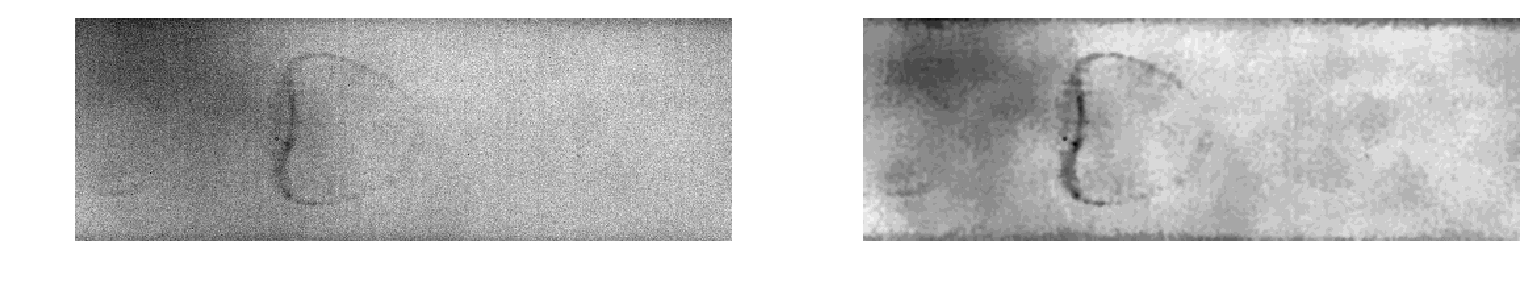

In [47]:
imgTocrop = cv2.imread("new_data/parachute.tif",0)
crop_img = imgTocrop[300:470, 300:800]
blurred_crop = ndimage.gaussian_filter(crop_img, 1.4)

denoised_gray = cv2.fastNlMeansDenoising(crop_img, None, 2, 7,3)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(denoised_gray)
denoised_gray2 = cv2.fastNlMeansDenoising(cl1, None, 2, 2)
equ2 = cv2.normalize(denoised_gray2, None, 0, 255, cv2.NORM_MINMAX)
#equ2=denoised_gray2
plt.figure(figsize=(40, 40))

plt.subplot(131)
plt.imshow(crop_img, cmap=plt.cm.gray)
plt.axis('off')

plt.subplot(132)
plt.imshow(equ2, cmap=plt.cm.gray)
plt.axis('off')


plt.show()

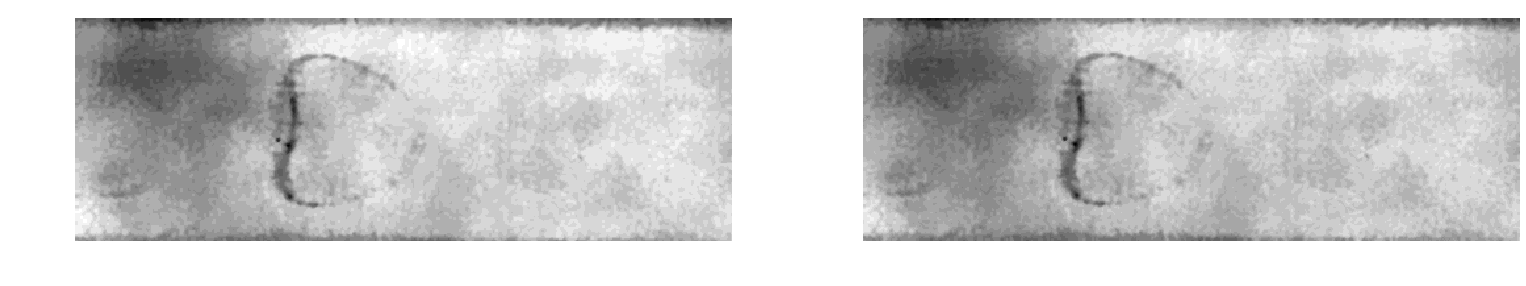

In [48]:
img_bw= equ2
se1 = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
se2 = cv2.getStructuringElement(cv2.MORPH_RECT, (2,2))
#mask = cv2.morphologyEx(img_bw, cv2.MORPH_CLOSE, se1)
mask = cv2.morphologyEx(img_bw, cv2.MORPH_OPEN, se2)

#mask = np.dstack([mask]) / 255
#out = img * mask
#cv2.destroyAllWindows()
#cv2.imwrite('output.png', out)

plt.figure(figsize=(40, 40))

plt.subplot(131)
plt.imshow(mask, cmap=plt.cm.gray)
plt.axis('off')

plt.subplot(132)
plt.imshow(equ2, cmap=plt.cm.gray)
plt.axis('off')


plt.show()

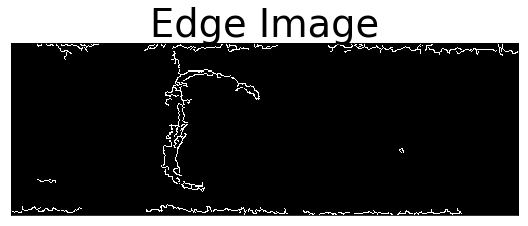

In [49]:
edges = cv2.Canny(mask,80,200)


plt.figure(figsize=(20, 20))

plt.subplot(121)
plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])


plt.show()

https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html

>Morphological transformations are some simple operations based on the image shape. It is normally performed on binary images. It needs two inputs, one is our original image, second one is called structuring element or kernel which decides the nature of operation. Two basic morphological operators are Erosion and Dilation. Then its variant forms like Opening, Closing, Gradient etc also comes into play

Erosion + Dilation = Opening
Dilatation + Erosion = Closing

### Gradient

In [50]:
def showImg(img,titre,pos):
    plt.figure(figsize=(40, 30))
    plt.subplot(pos)
    plt.imshow(img,cmap = 'gray')
    plt.title(titre), plt.xticks([]), plt.yticks([])
    plt.show()

C:\Users\Martin\Anaconda3\envs\deepl\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
C:\Users\Martin\Anaconda3\envs\deepl\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
C:\Users\Martin\Anaconda3\envs\deepl\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in arctan
  


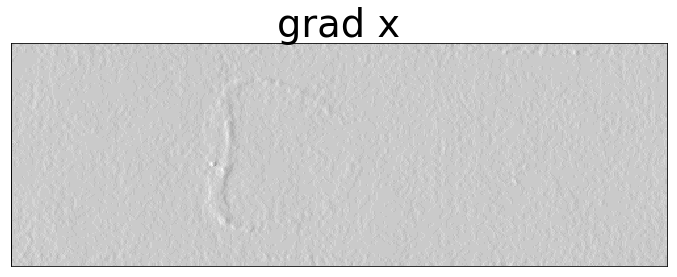

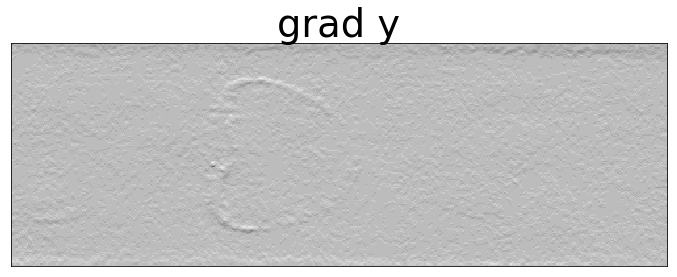

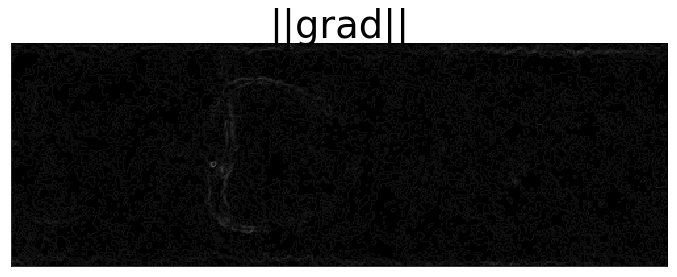

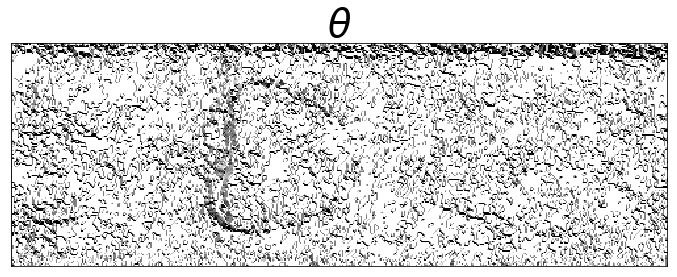

In [51]:
ker_x = [[-1, 1]]
im_x = signal.convolve2d(equ2, ker_x, mode='same')
ker_y = [[-1], [1]]
im_y = signal.convolve2d(equ2, ker_y, mode='same')
im_mag = np.sqrt(im_x**2 + im_y**2)
im_dir = np.arctan(im_y/im_x)

showImg(im_x,'grad x',231)
showImg(im_y,'grad y',232)
showImg(im_mag,'||grad||',233)
showImg(im_dir,r'$\theta$',234)
# plt.figure(figsize=(20, 20))

# plt.subplot(231)
# plt.imshow(im_x,cmap = 'gray')
# plt.title('Gradient x'), plt.xticks([]), plt.yticks([])
# plt.subplot(232)
# plt.imshow(im_y,cmap = 'gray')
# plt.title('Gradient y'), plt.xticks([]), plt.yticks([])
# pylab.subplot(233),
# plt.imshow(im_mag
# plt.title('Gradient y'), plt.xticks([]), plt.yticks([])
# pylab.subplot(234), plot_image(im_dir, r'$\theta$')

# plt.show()

### Dilatation

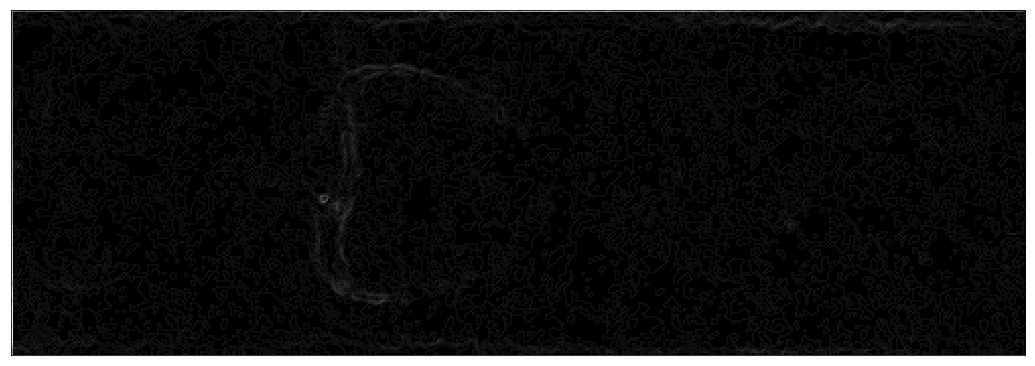

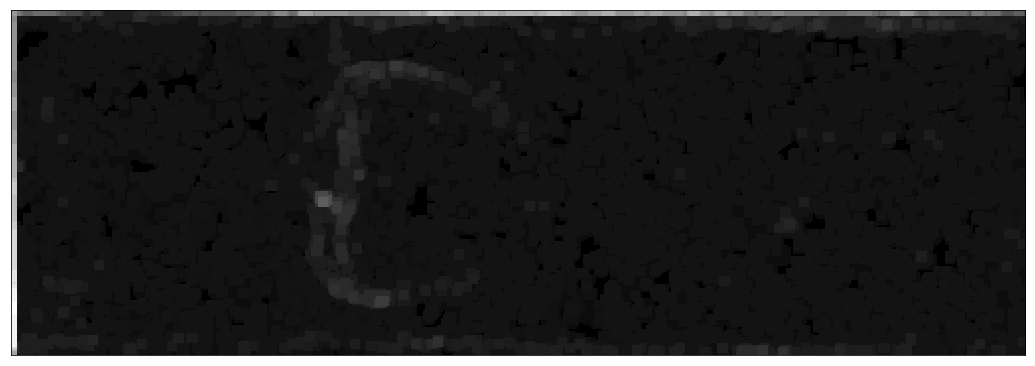

In [52]:
kernel = np.ones((5,5),np.uint8)
dilation = cv2.dilate(im_mag,kernel,iterations = 1)
showImg(im_mag,'',121)
showImg(dilation,'',121)

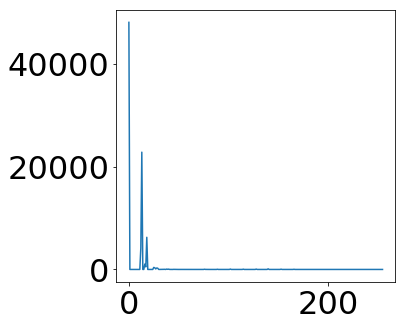

In [53]:
histgg = cv2.calcHist([np.uint8(im_mag.astype(int))],[0],None,[256],[0,256])  
fig=plt.figure(figsize=(5,5))
plt.plot(histgg) 
plt.show()

In [54]:
im_mag

array([[144.24978336, 102.        , 115.73245007, ...,  77.1038261 ,
         76.        ,  65.11528238],
       [102.        ,  18.38477631,   0.        , ...,  18.38477631,
         13.        ,  12.        ],
       [115.73245007,  18.38477631,  13.        , ...,  18.38477631,
         18.38477631,  17.69180601],
       ...,
       [140.60227594,  13.        ,  18.38477631, ...,   0.        ,
         13.        ,  18.38477631],
       [153.55129436,  13.        ,  13.        , ...,   0.        ,
         13.        ,  13.        ],
       [153.        ,  13.        ,  13.        , ...,   0.        ,
         13.        ,  13.        ]])

### Gamma and log contrast adjustment

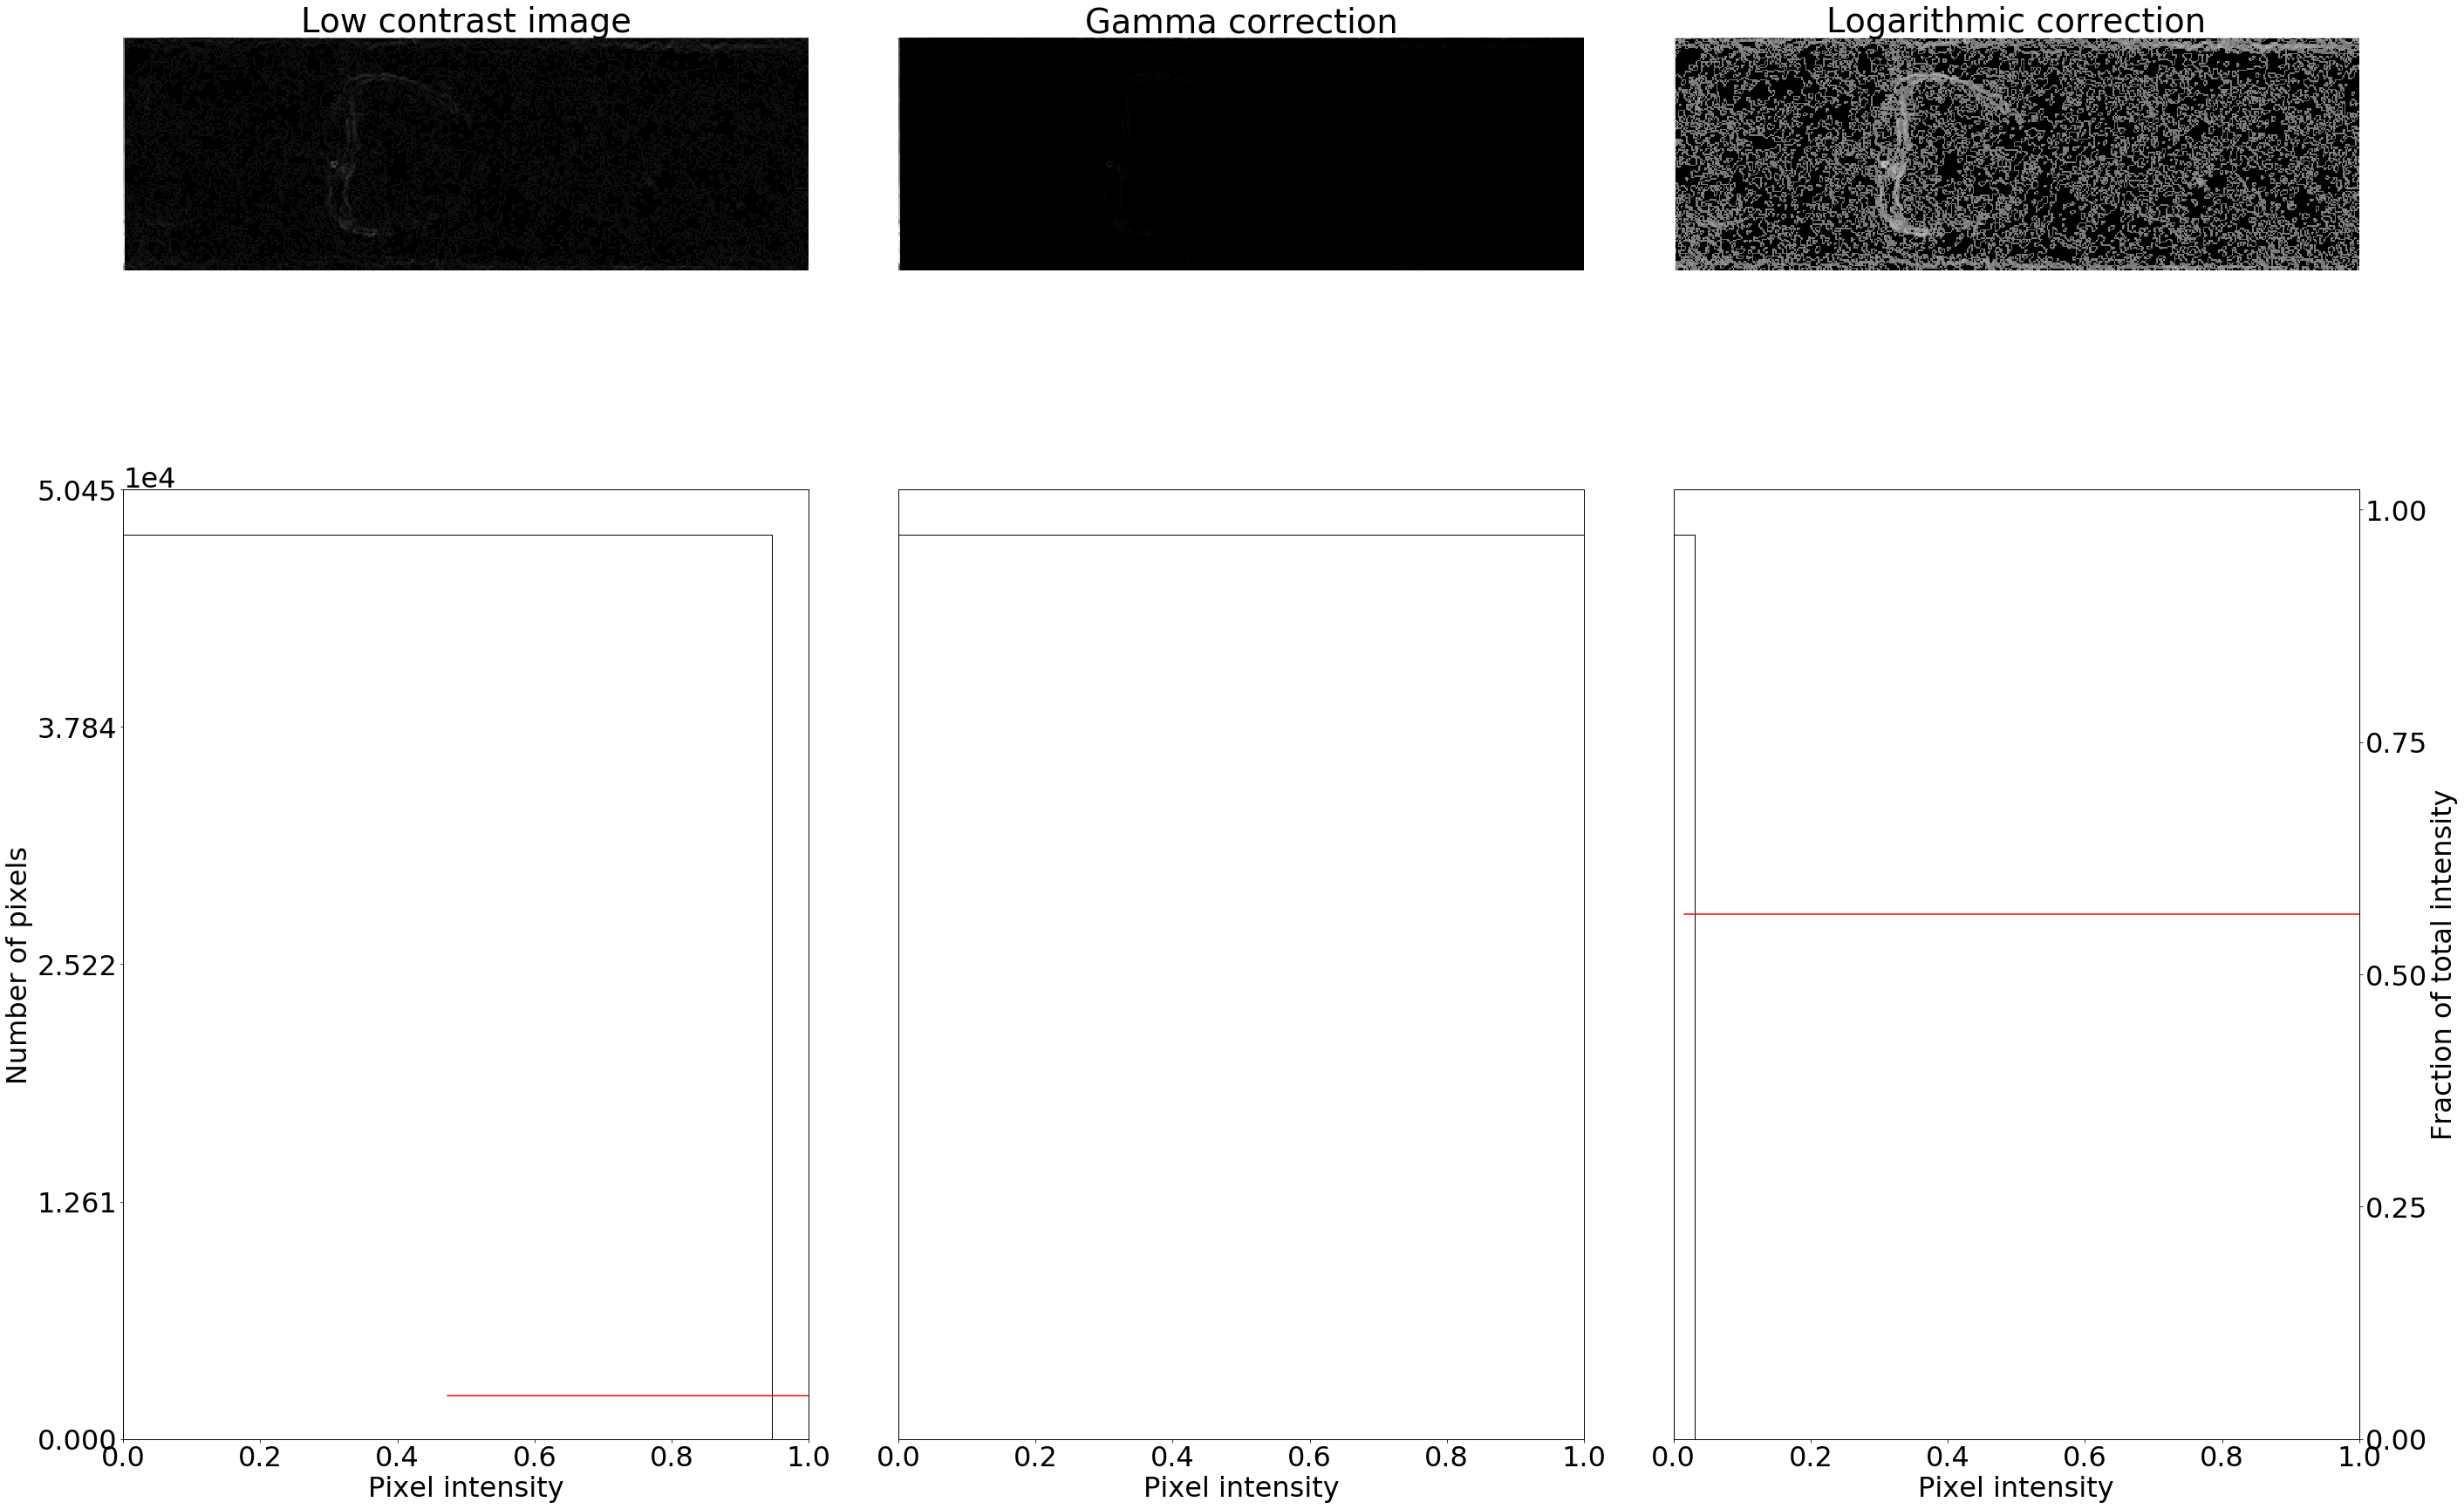

In [55]:
import matplotlib
from skimage import exposure
from skimage import img_as_float

matplotlib.rcParams['font.size'] = 32

def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    image = img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf


# Load an example image
img = im_mag

# Gamma
gamma_corrected = exposure.adjust_gamma(img, 2)

# Logarithmic
logarithmic_corrected = exposure.adjust_log(img, 1)

# Display results
fig = plt.figure(figsize=(40, 30))
axes = np.zeros((2, 3), dtype=np.object)
axes[0, 0] = plt.subplot(2, 3, 1)
axes[0, 1] = plt.subplot(2, 3, 2, sharex=axes[0, 0], sharey=axes[0, 0])
axes[0, 2] = plt.subplot(2, 3, 3, sharex=axes[0, 0], sharey=axes[0, 0])
axes[1, 0] = plt.subplot(2, 3, 4)
axes[1, 1] = plt.subplot(2, 3, 5)
axes[1, 2] = plt.subplot(2, 3, 6)
ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(gamma_corrected, axes[:, 1])
ax_img.set_title('Gamma correction')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(logarithmic_corrected, axes[:, 2])
ax_img.set_title('Logarithmic correction')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()

### Histogram Equalization

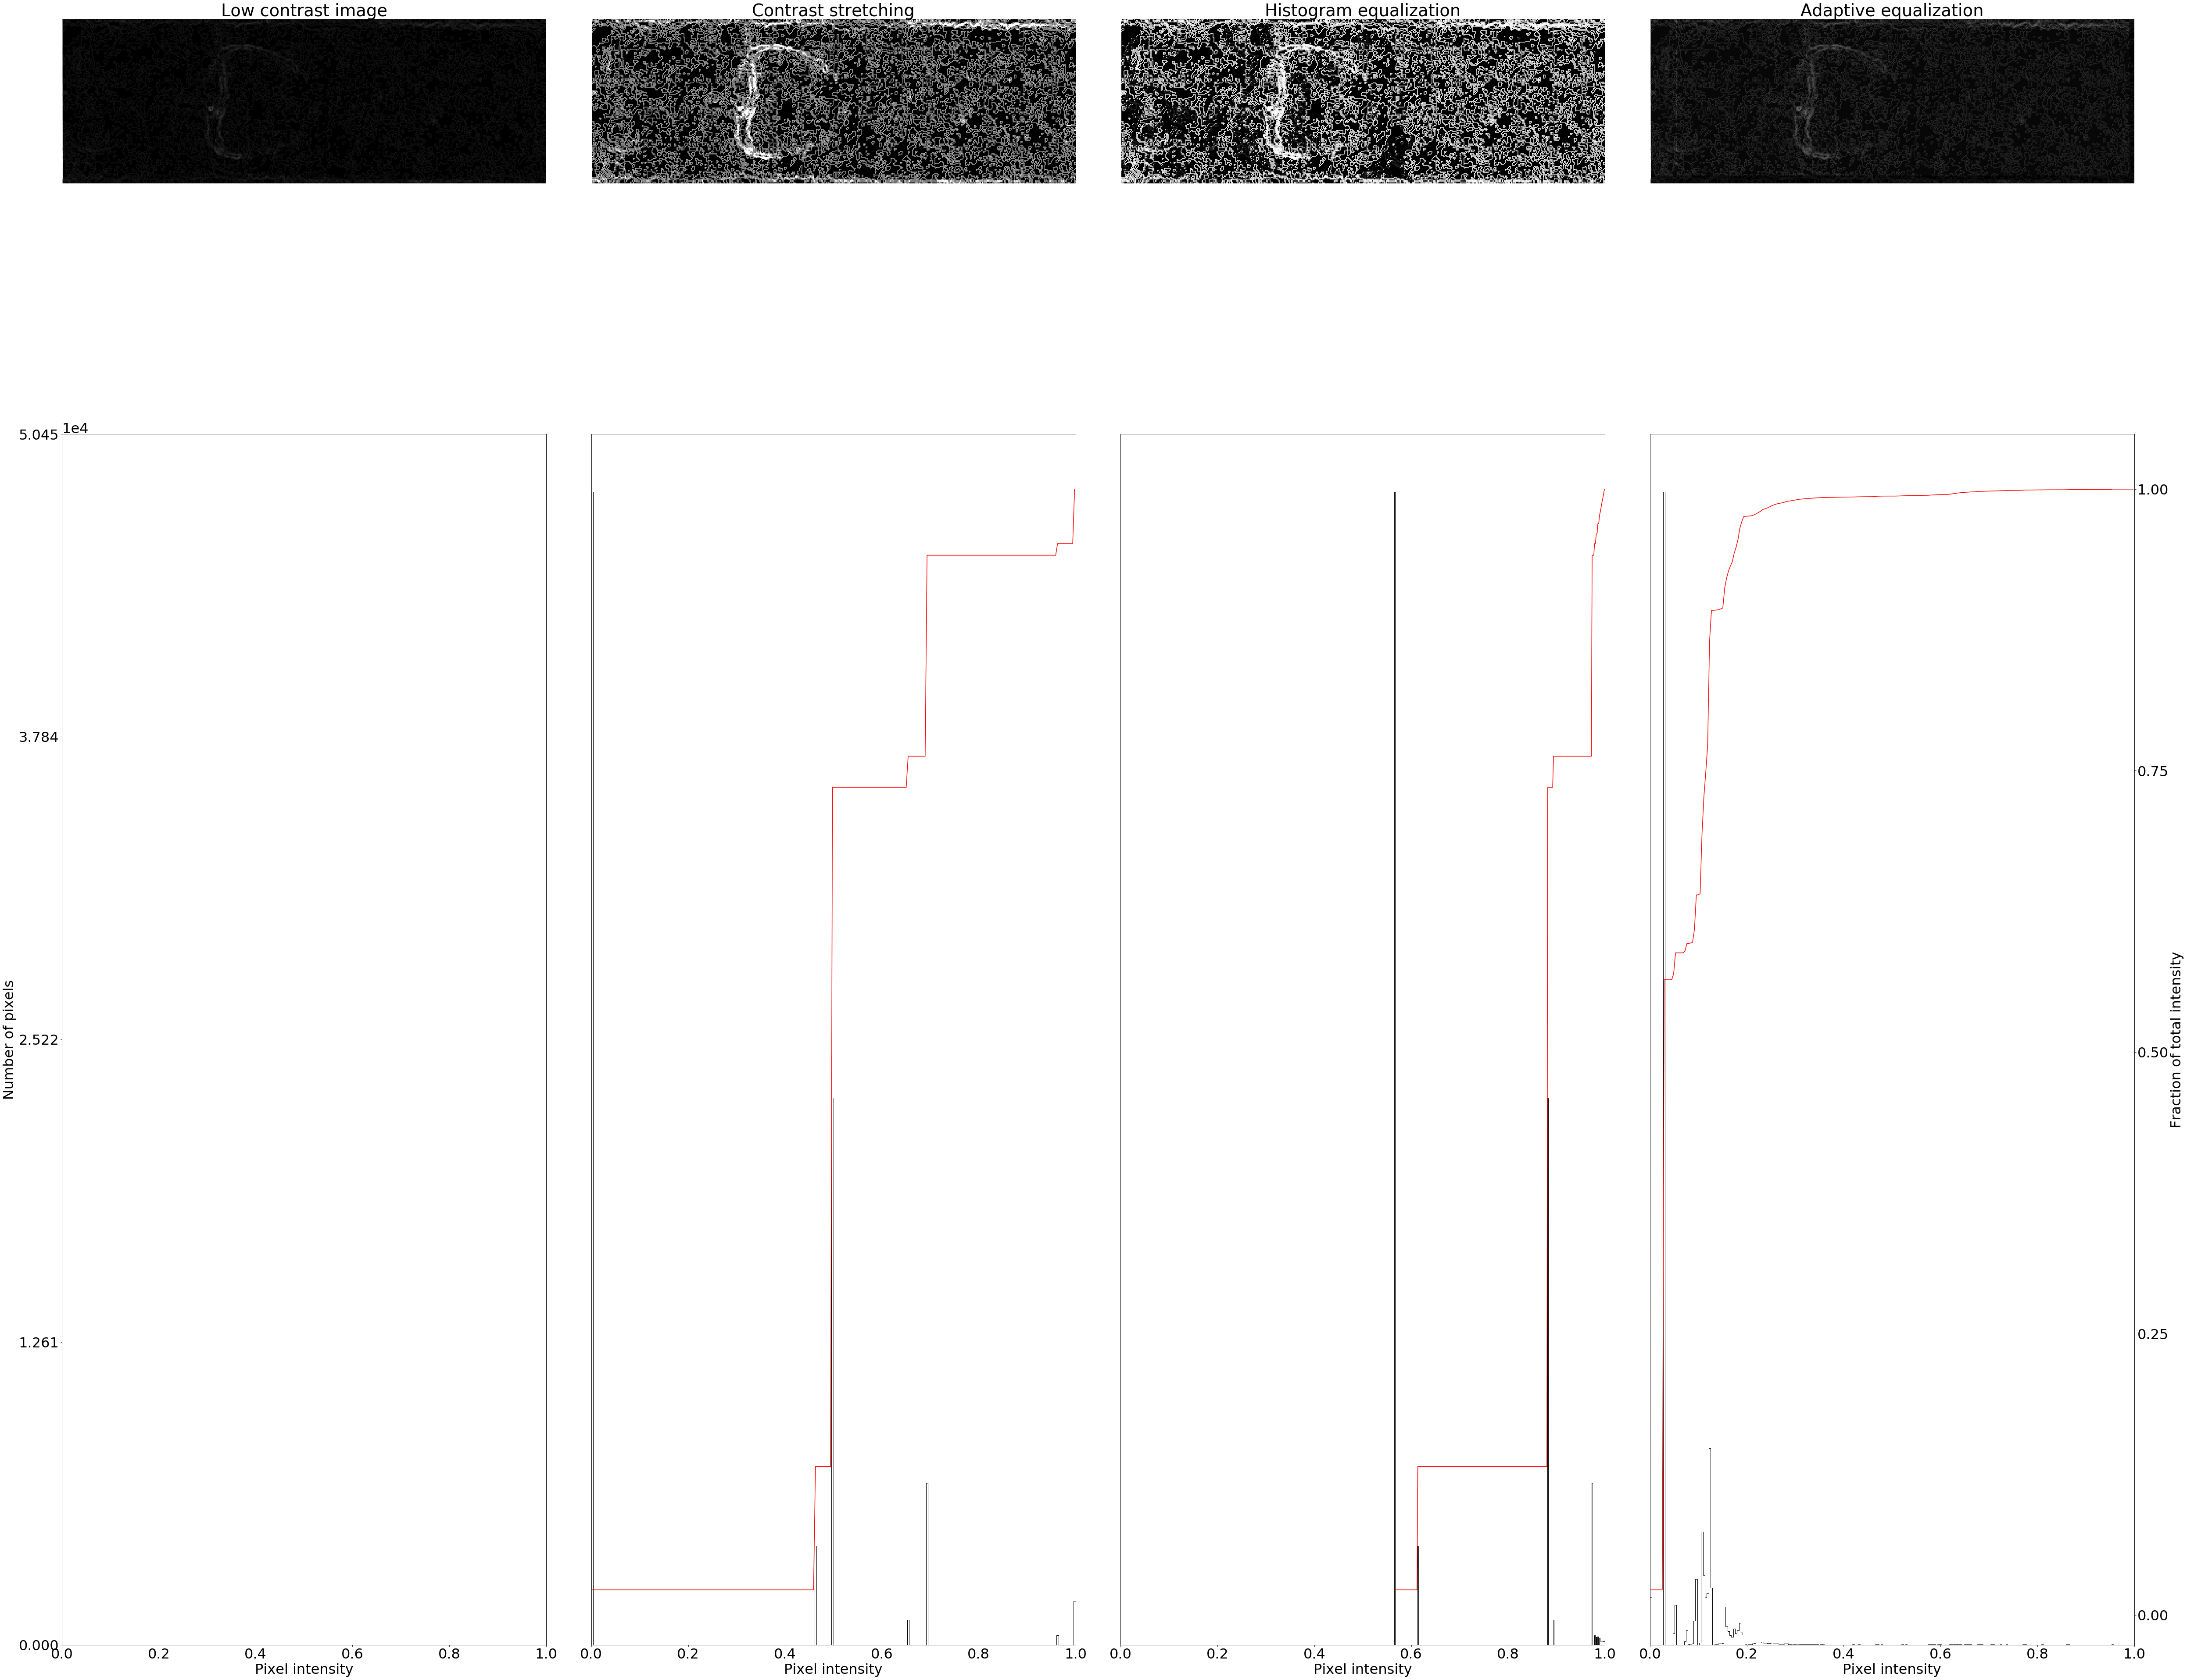

In [56]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from skimage import data, img_as_float
from skimage import exposure


matplotlib.rcParams['font.size'] = 32


def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    image = img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf


# Load an example image
img = np.rint(im_mag)
img = img.astype(int)

# Contrast stretching
p2, p98 = np.percentile(img, (2, 98))
img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))

# Equalization
img_eq = exposure.equalize_hist(img)

# Adaptive Equalization
img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)

# Display results
fig = plt.figure(figsize=(70, 70))
axes = np.zeros((2, 4), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 4, 1)
for i in range(1, 4):
    axes[0, i] = fig.add_subplot(2, 4, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 4):
    axes[1, i] = fig.add_subplot(2, 4, 5+i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Contrast stretching')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title('Histogram equalization')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_adapteq, axes[:, 3])
ax_img.set_title('Adaptive equalization')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()

In [57]:
#img_rescale = img_rescale.astype(float)

In [58]:
#img_rescale*= (255.0/img_rescale.max())

In [93]:
#image*= (255.0/image.max())

In [184]:
image = img_rescale
Copy = np.uint8(image)

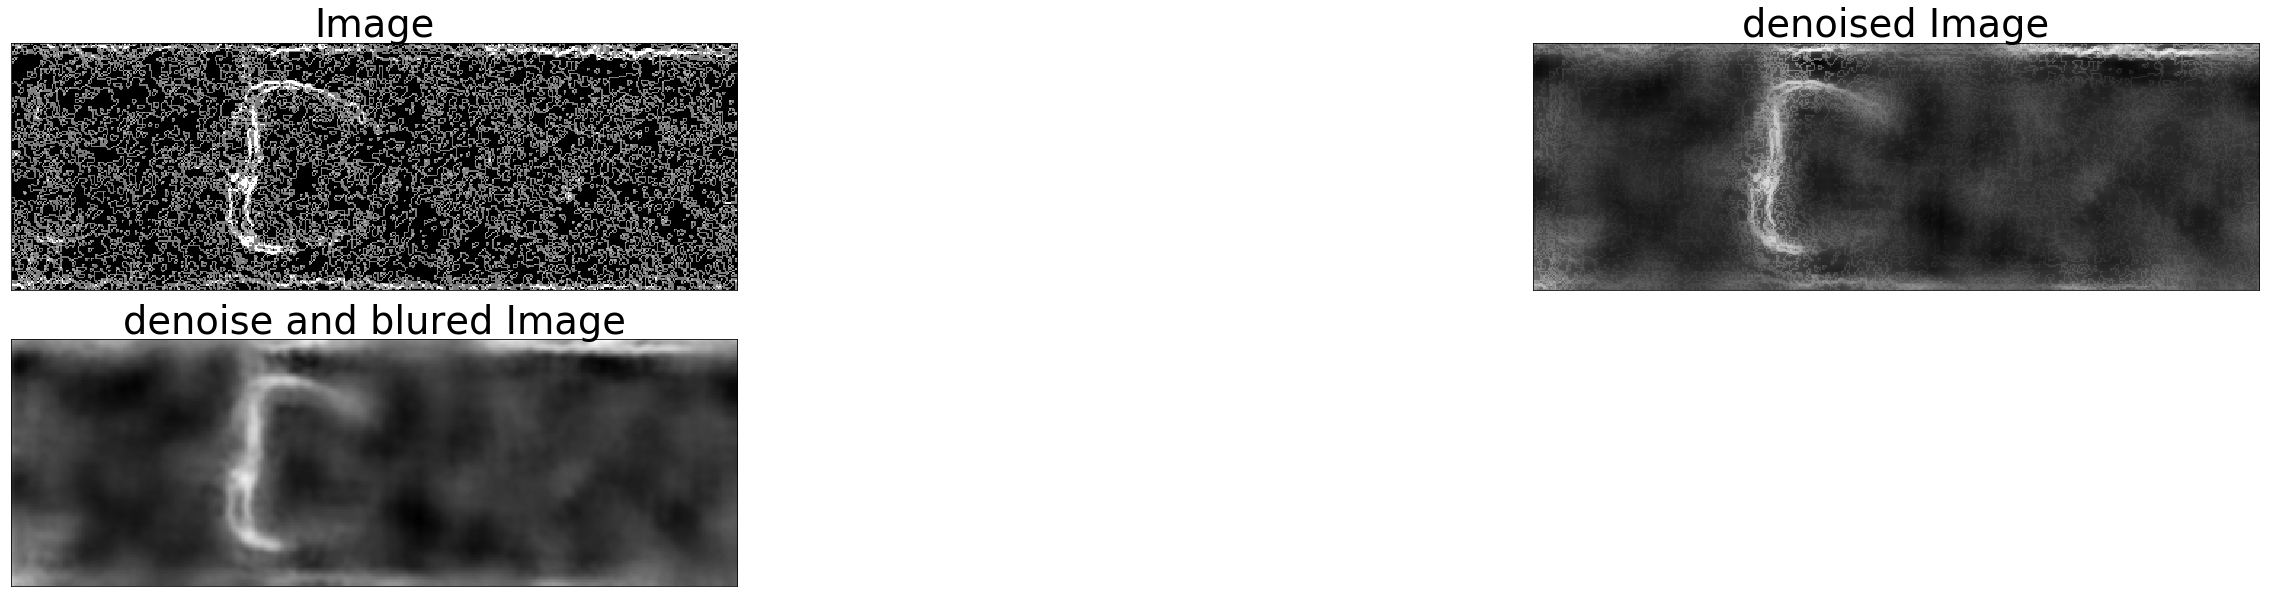

In [185]:
denoised_gray = cv2.fastNlMeansDenoising(Copy,None,50,43,30)

blurreddenoised_crop = ndimage.gaussian_filter(denoised_gray, 2)

plt.figure(figsize=(50, 10))

# plt.subplot(121)
# plt.imshow(crop_img,cmap = 'gray')
# plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(221)
plt.imshow(Copy,cmap="gray")
plt.title('Image'), plt.xticks([]), plt.yticks([])


plt.subplot(222)
plt.imshow(denoised_gray,cmap="gray")
plt.title('denoised Image'), plt.xticks([]), plt.yticks([])

plt.subplot(223)
plt.imshow(blurreddenoised_crop, cmap=plt.cm.gray)
plt.title('denoise and blured Image'), plt.xticks([]), plt.yticks([])


plt.show()

### Canny

In [159]:
print(blurreddenoised_crop.max())
print(blurreddenoised_crop.min())
print(blurreddenoised_crop.mean())

156
28
60.49088235294118


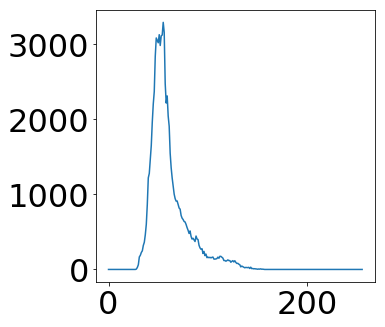

In [186]:
histgg = cv2.calcHist([np.uint8(blurreddenoised_crop.astype(int))],[0],None,[256],[0,256])  
fig=plt.figure(figsize=(5,5))
plt.plot(histgg) 

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

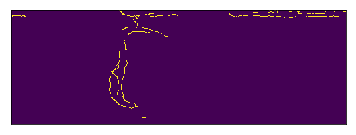

In [187]:
canny = cv2.Canny(blurreddenoised_crop,0,70)
plt.imshow(canny),
plt.xticks([]), plt.yticks([])

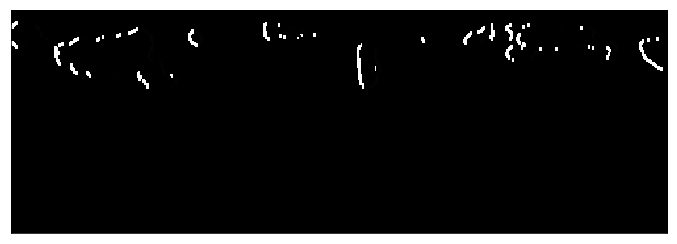

In [157]:
edges_adapt = ndimage.sobel(blurreddenoised_crop)
showImg(edges_adapt,"",231)

### Binarisation threshold

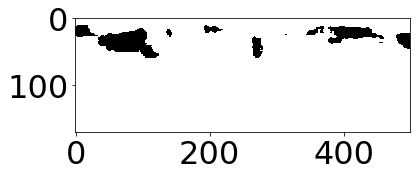

In [153]:
gray_r = blurreddenoised_crop.reshape(blurreddenoised_crop.shape[0]*blurreddenoised_crop.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(blurreddenoised_crop.shape[0],blurreddenoised_crop.shape[1])
plt.imshow(gray, cmap='gray')

In [ ]:
ker_x = [[-1, 1]]
im_x = signal.convolve2d(canny, ker_x, mode='same')
ker_y = [[-1], [1]]
im_y = signal.convolve2d(canny, ker_y, mode='same')

In [ ]:
plt.imshow(im_x,cmap='gray')

In [ ]:
plt.imshow(im_y)

### Bounding box

In [188]:
blurreddenoised_crop

array([[109, 107, 106, ..., 121, 121, 121],
       [106, 105, 104, ..., 118, 119, 119],
       [102, 101, 100, ..., 114, 114, 115],
       ...,
       [128, 125, 122, ...,  73,  74,  75],
       [127, 124, 120, ...,  73,  74,  75],
       [126, 123, 118, ...,  73,  74,  75]], dtype=uint8)

In [175]:
blurreddenoised_crop = blurreddenoised_crop.astype(float)
blurreddenoised_crop *= (255.0/blurreddenoised_crop.max())

In [196]:
print(blurreddenoised_crop.max())
print(blurreddenoised_crop.min())
print(blurreddenoised_crop.mean())

151
0
59.53375294117647


In [197]:
blurreddenoised_crop.min()

0

In [ ]:
img = blurreddenoised_crop
ret,thresh = cv2.threshold(img,100,255,0)
#ret,thresh = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C)
im2,contours,hierarchy = cv2.findContours(thresh, 1, 2)
for item in range(len(contours)):
    cnt = contours[item]
    if len(cnt)>20:
        print(len(cnt))
        M = cv2.moments(cnt)
        cx = int(M['m10']/M['m00'])
        cy = int(M['m01']/M['m00'])
        x,y,w,h = cv2.boundingRect(cnt)
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
        cv2.imshow('image',img)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        #plt.imshow(img)

In [178]:
np.unique(blurreddenoised_crop)

array([ 45.76923077,  47.40384615,  49.03846154,  50.67307692,
        52.30769231,  53.94230769,  55.57692308,  57.21153846,
        58.84615385,  60.48076923,  62.11538462,  63.75      ,
        65.38461538,  67.01923077,  68.65384615,  70.28846154,
        71.92307692,  73.55769231,  75.19230769,  76.82692308,
        78.46153846,  80.09615385,  81.73076923,  83.36538462,
        85.        ,  86.63461538,  88.26923077,  89.90384615,
        91.53846154,  93.17307692,  94.80769231,  96.44230769,
        98.07692308,  99.71153846, 101.34615385, 102.98076923,
       104.61538462, 106.25      , 107.88461538, 109.51923077,
       111.15384615, 112.78846154, 114.42307692, 116.05769231,
       117.69230769, 119.32692308, 120.96153846, 122.59615385,
       124.23076923, 125.86538462, 127.5       , 129.13461538,
       130.76923077, 132.40384615, 134.03846154, 135.67307692,
       137.30769231, 138.94230769, 140.57692308, 142.21153846,
       143.84615385, 145.48076923, 147.11538462, 148.75

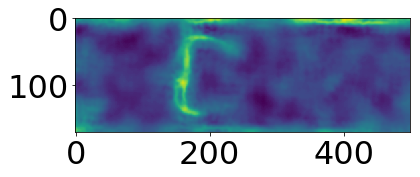

In [179]:
plt.imshow(blurreddenoised_crop)

In [89]:
blurreddenoised_crop

array([[130, 128, 125, ..., 135, 135, 135],
       [127, 125, 122, ..., 131, 132, 132],
       [122, 120, 117, ..., 125, 126, 126],
       ...,
       [142, 139, 134, ...,  71,  71,  71],
       [141, 137, 130, ...,  71,  71,  72],
       [140, 135, 128, ...,  71,  71,  72]], dtype=uint8)

In [192]:
len(contours)

1

In [190]:
thresh

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [183]:
np.unique(thresh)

array([255.])

In [194]:
np.unique(Copy)

array([  0, 117, 127, 166, 176, 245, 255], dtype=uint8)